In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/offic/OneDrive/Masaüstü/datasets/eeg_eye/eeg_eye.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  


AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64
                 AF3            F7            F3            FC5            T7  \
count   14980.000000  14980.000000  14980.000000   14980.000000  14980.000000   
mean     4321.917777   4009.767694   4264.022433    4164.946326   4341.741075   
std      2492.072174     45.941672     44.428052    5216.404632     34.738821   
min      1030.770000   2830.770000   1040.000000    2453.330000   2089.740000   
25%      4280.510000   3990.770000   4250.260000    4108.210000   4331.790000   
50%      4294.360000   4005.640000   4262.560000    4120.510000   4338.970000   
75%      4311.790000   4023.080000   4270.770000    4132.310000   4347.180000   
max    309231.000000   7804.620000   6880.510000  642564.000000   647

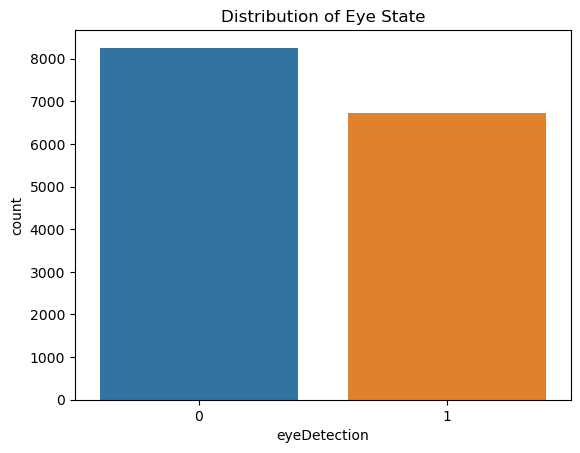

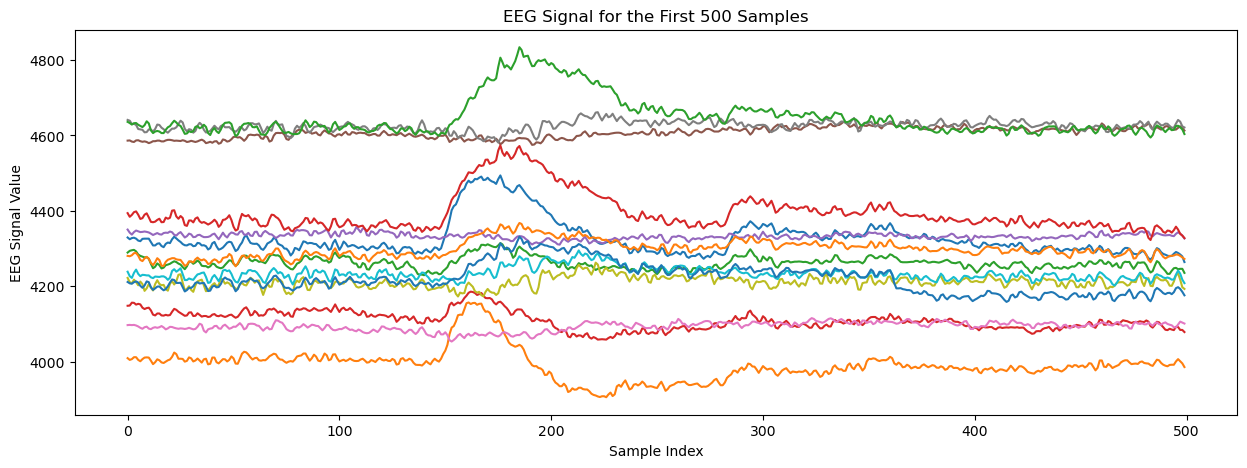

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Distribution of the target variable
sns.countplot(x='eyeDetection', data=data)
plt.title('Distribution of Eye State')
plt.show()

# Plotting EEG signals for a sample
plt.figure(figsize=(15, 5))
plt.plot(data.iloc[:500, :-1])
plt.title('EEG Signal for the First 500 Samples')
plt.xlabel('Sample Index')
plt.ylabel('EEG Signal Value')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns='eyeDetection')
y = data['eyeDetection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training Logistic Regression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.61
Confusion Matrix for Logistic Regression:
[[1250  336]
 [ 822  588]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      1586
           1       0.64      0.42      0.50      1410

    accuracy                           0.61      2996
   macro avg       0.62      0.60      0.59      2996
weighted avg       0.62      0.61      0.60      2996



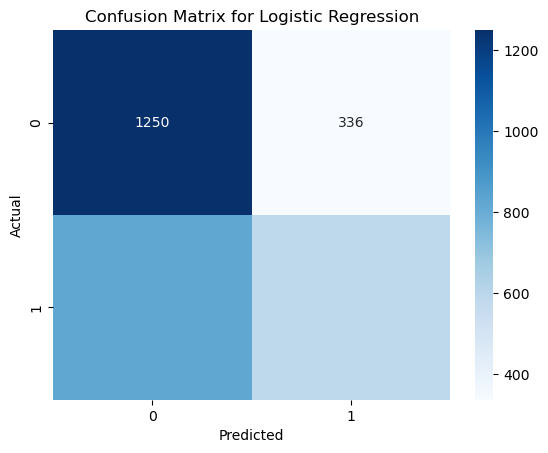

Training Random Forest...
Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\offic\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy for Random Forest: 0.93
Confusion Matrix for Random Forest:
[[1521   65]
 [ 155 1255]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1586
           1       0.95      0.89      0.92      1410

    accuracy                           0.93      2996
   macro avg       0.93      0.92      0.93      2996
weighted avg       0.93      0.93      0.93      2996



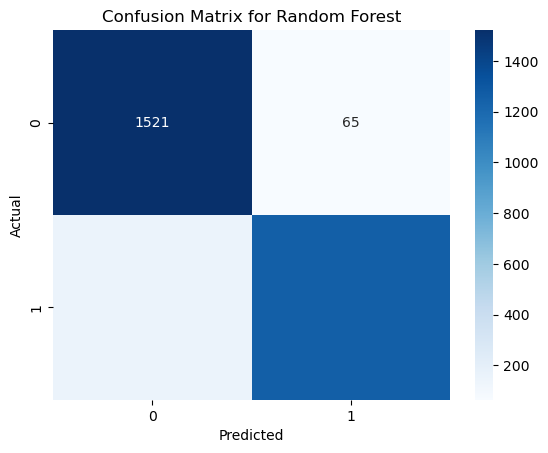

Training SVM...
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy for SVM: 0.87
Confusion Matrix for SVM:
[[1410  176]
 [ 224 1186]]
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1586
           1       0.87      0.84      0.86      1410

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996



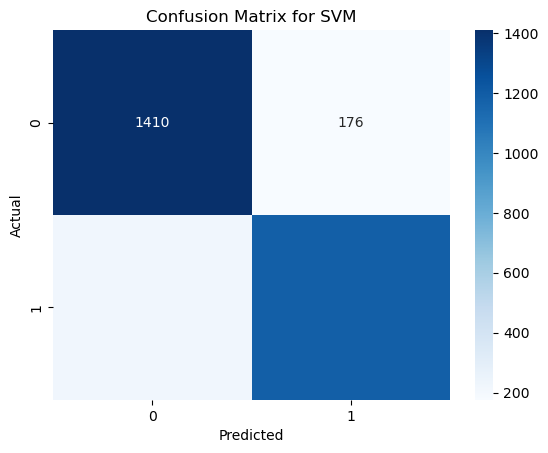

Training Gradient Boosting...
Fitting 3 folds for each of 576 candidates, totalling 1728 fits


C:\Users\offic\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Gradient Boosting: {'learning_rate': 0.3, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy for Gradient Boosting: 0.95
Confusion Matrix for Gradient Boosting:
[[1534   52]
 [  93 1317]]
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1586
           1       0.96      0.93      0.95      1410

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      0.95      2996



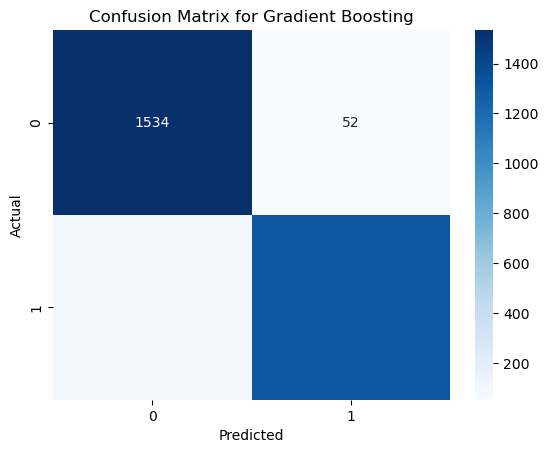

In [22]:
# Define models and hyperparameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

params = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Train, tune, and evaluate models
best_estimators = {}
for model_name in models:
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f'Best Parameters for {model_name}: {grid_search.best_params_}')
    print(f'Accuracy for {model_name}: {accuracy:.2f}')
    print(f'Confusion Matrix for {model_name}:\n{conf_matrix}')
    print(f'Classification Report for {model_name}:\n{class_report}')
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()